In [1]:
import torch

#### Follow along by creating and running cells below!

In [2]:
# Checking torch version can be achieved as follows
torch.__version__

'2.0.1+cpu'

### From Scalar to Tensor

In [3]:
# Creating Tensors is easy in Torch:
scalar = torch.tensor(7)
scalar

tensor(7)

In [4]:
scalar.ndim

0

If you want to turn this element into an integer, you can use the `item()` method:

In [5]:
scalar.item()

7

Adding more dimensions to our `tensor` object:

In [6]:
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [10]:
matrix = torch.tensor([[7, 8], 
                       [9, 10]])

matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [11]:
tensor = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [12]:
# Checking the shape of our tensor:
tensor.shape

torch.Size([1, 3, 3])

A very cool representation of these objects:

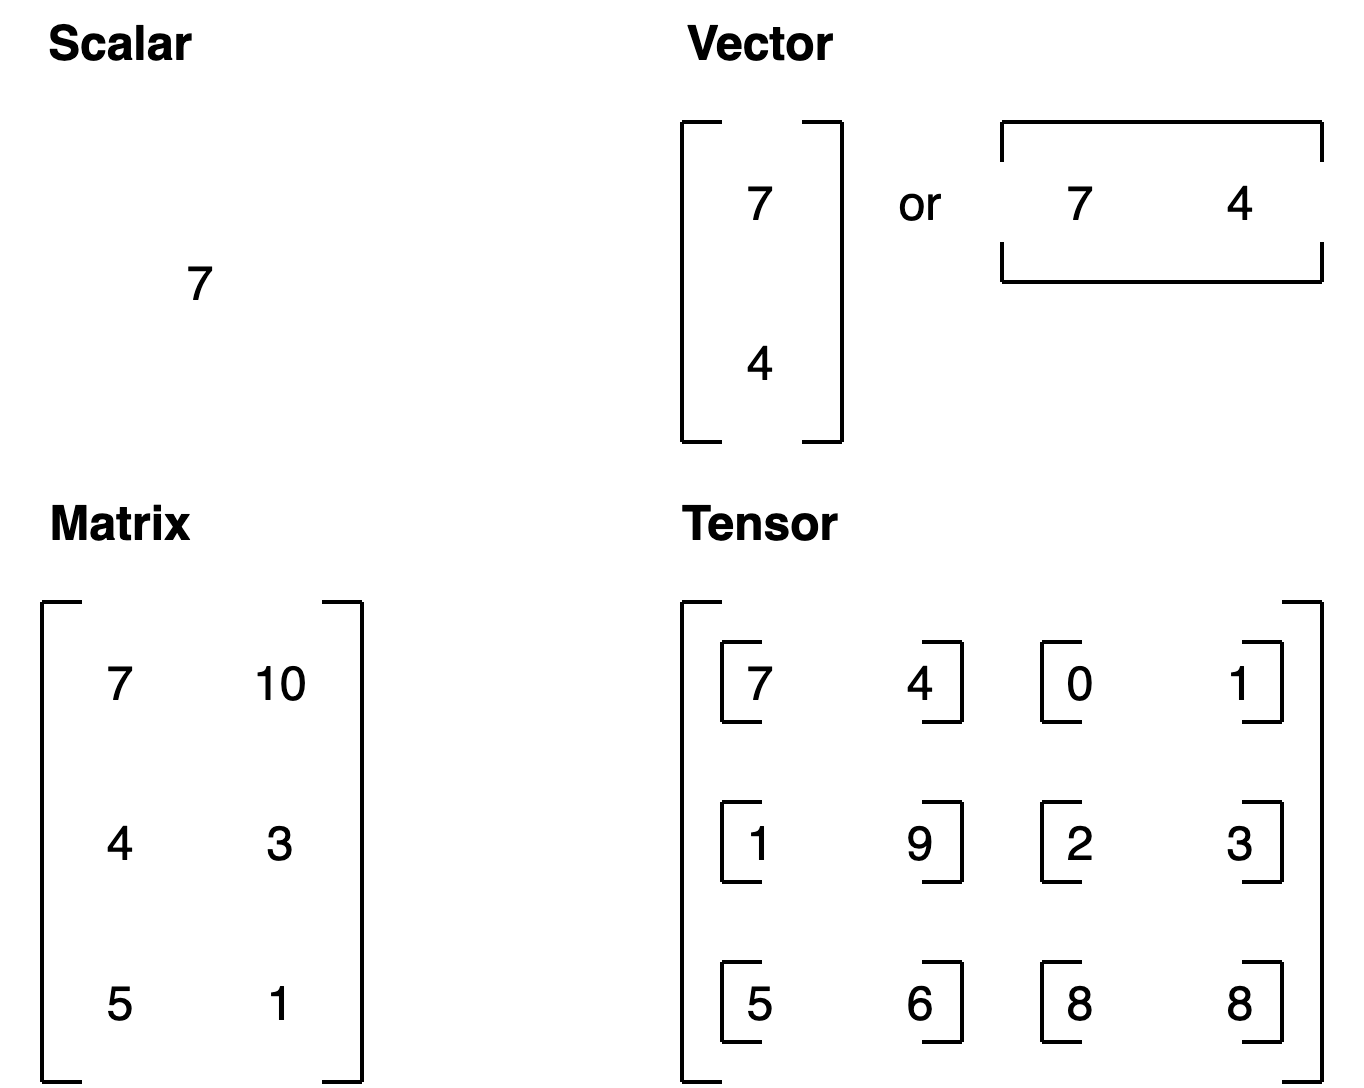

### Creating Random Tensors

In [13]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.3791, 0.3078, 0.6342, 0.3369],
         [0.5975, 0.0656, 0.9982, 0.7897],
         [0.7182, 0.0578, 0.2584, 0.4626]]),
 torch.float32)

In [15]:
# Cool thing about torch.rand? We can adjust the size
# to what we would like
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Tensor dtypes

In [16]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [17]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

### Knowing stuff about our Tensors! - or the what, what, where formula

In [18]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") 

tensor([[0.6716, 0.7662, 0.2234, 0.4752],
        [0.9599, 0.2349, 0.1252, 0.0196],
        [0.8291, 0.7964, 0.1782, 0.6024]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Tensor Operations

In [19]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [20]:
# Multiply it by 25
tensor * 25

tensor([25, 50, 75])

In [21]:
# Tensor operations are not done in-place
tensor = tensor + 10
tensor

tensor([11, 12, 13])

In [22]:
# Operations can also be done using torch function
tensor = torch.tensor([1,2,3])
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [23]:
# Hadamard product
tensor * tensor

tensor([1, 4, 9])

In [27]:
# Pure matrix multiplication
torch.matmul(tensor, tensor)

# or

tensor @ tensor

tensor(14)

In [28]:
# Remember that you must keep inner dimensions of the matrix
# coherent for this to work

# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [37]:
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Here's a great example of pure matrix multiplication (also refered as the dot product):

![image.png](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-matrix-multiply-crop.gif)

### Linear Layer Examples

In [42]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input 
                         out_features=6) # out_features = describes outer value 
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


### Indexing

In [43]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [45]:
# Indexing is similar to other Python objects
print(f"First square bracket:\n{x[0]}") 
print(f"Second square bracket: {x[0][0]}") 
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


### Checking for GPUs

In [47]:
# Check for GPU
import torch
torch.cuda.is_available()

False

In [49]:
# Tensor on CPU example

# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)


tensor([1, 2, 3]) cpu
